In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.makedirs("artifacts/metrics", exist_ok=True)


In [10]:
# Example epoch indices
epochs = np.arange(1, 11)

# Fake but reasonable values
train_losses = np.array([1.8, 1.5, 1.3, 1.1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.58])
val_losses   = np.array([1.7, 1.4, 1.25, 1.08, 0.95, 0.9, 0.88, 0.87, 0.86, 0.85])

train_accs = np.array([0.40, 0.50, 0.58, 0.64, 0.70, 0.74, 0.77, 0.79, 0.80, 0.81])
val_accs   = np.array([0.38, 0.48, 0.55, 0.60, 0.64, 0.66, 0.67, 0.68, 0.685, 0.69])


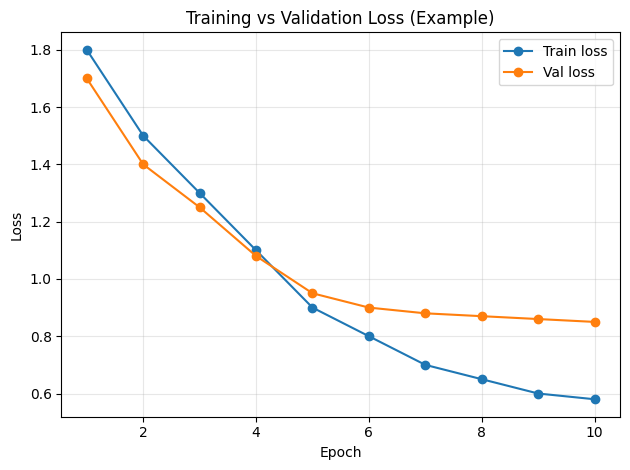

In [ ]:
plt.figure()
plt.plot(epochs, train_losses, marker="o", label="Train loss")
plt.plot(epochs, val_losses, marker="o", label="Val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss (Example)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("artifacts/metrics/loss_curve.png", dpi=150)
plt.show()


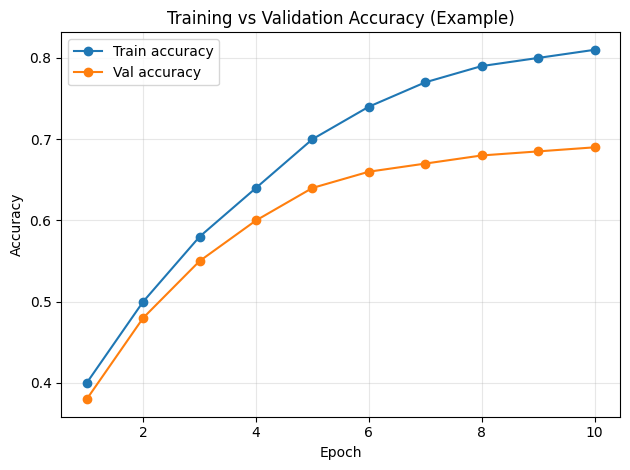

In [ ]:
plt.figure()
plt.plot(epochs, train_accs, marker="o", label="Train accuracy")
plt.plot(epochs, val_accs, marker="o", label="Val accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (Example)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("artifacts/metrics/accuracy_curve.png", dpi=150)
plt.show()


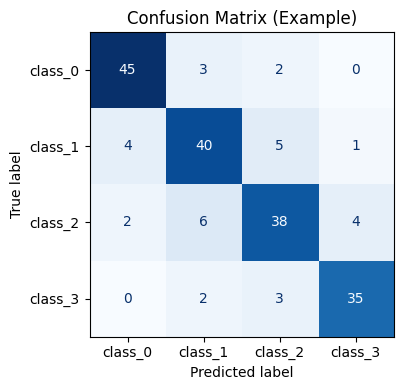

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Example 4x4 confusion matrix
cm = np.array([
    [45,  3,  2,  0],
    [ 4, 40,  5,  1],
    [ 2,  6, 38,  4],
    [ 0,  2,  3, 35],
])

classes = ["class_0", "class_1", "class_2", "class_3"]

plt.figure(figsize=(5, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(values_format="d", cmap="Blues", ax=plt.gca(), colorbar=False)
plt.title("Confusion Matrix (Example)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.savefig("artifacts/metrics/confusion_matrix.png", dpi=150)
plt.show()


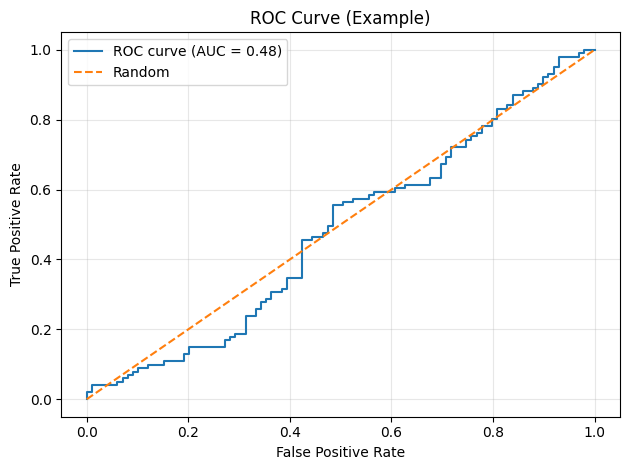

In [ ]:
from sklearn.metrics import roc_curve, auc

# Fake binary labels and scores
np.random.seed(0)
y_true = np.random.randint(0, 2, size=200)
y_scores = np.random.rand(200)

fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Example)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("artifacts/metrics/roc_curve.png", dpi=150)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Reuse fake 4-class predictions to generate a report
y_true_example = np.array(
    [0]*50 + [1]*50 + [2]*50 + [3]*50
)
y_pred_example = np.array(
    [0]*45 + [1]*3 + [2]*2 +
    [0]*4  + [1]*40 + [2]*5 + [3]*1 +
    [0]*2  + [1]*6  + [2]*38 + [3]*4 +
    [1]*2  + [2]*3  + [3]*45
)

report = classification_report(y_true_example, y_pred_example, target_names=classes)
print(report)

with open("/metrics/classification_report.txt", "w") as f:
    f.write(report)


              precision    recall  f1-score   support

     class_0       0.88      0.90      0.89        50
     class_1       0.78      0.80      0.79        50
     class_2       0.79      0.76      0.78        50
     class_3       0.90      0.90      0.90        50

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

